## Violin Plots

- https://www.youtube.com/watch?v=0hr61L-LZyM
- https://www.youtube.com/watch?v=f8Kh4PByiEA

There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

Seaborn's [violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html) function can be used to create violin plots.

### Example 1. Violin plot for plotting a Quantitative variable (fuel efficiency) versus Qualitative variable (vehicle class)

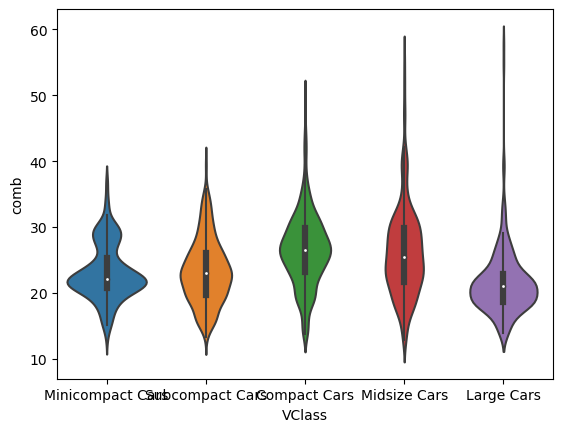

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the CSV file
fuel_econ = pd.read_csv('data/fuel-econ.csv')
fuel_econ.head(10)

# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

sb.violinplot(data=fuel_econ, x='VClass', y='comb');

You can see that each level has been rendered in a different color, like how the plain `countplot()` was in the previous lesson. We can set the "color" parameter to make each curve the same color if it is not meaningful.
Inside each curve, there is a black shape with a white dot inside, a miniature box plot. A further discussion of box plots will be performed on the next page. If you'd like to remove the box plot, you can set the `inner = None` parameter in the `violinplot` call to simplify the look of the final visualization.

### Example 2. Violin plot without datapoints in the violin interior


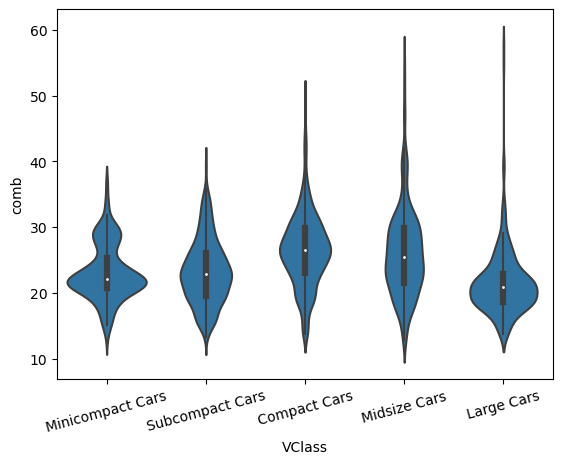

In [15]:
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, innner=None)
plt.xticks(rotation=15);

### Additional Variation
Much like how the bar chart could be rendered with horizontal bars, the violin plot can also be rendered horizontally. Seaborn is smart enough to make an appropriate inference on which orientation is requested, depending on whether "x" or "y" receives the categorical variable. But if both variables are numeric (e.g., one is discretely-valued) then the "orient" parameter can be used to specify the plot orientation.


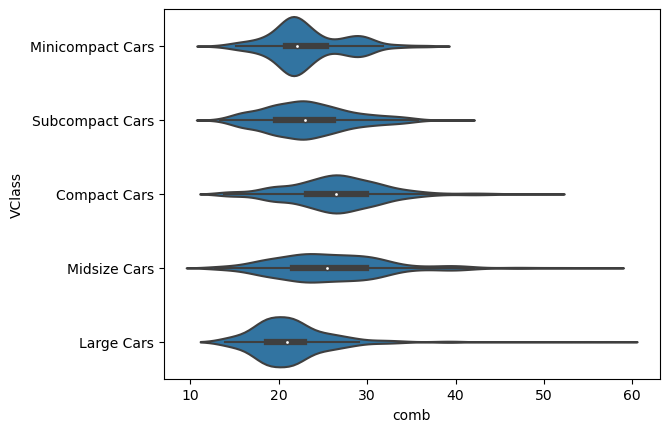

In [16]:
sb.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, innner=None);

# Box Plots

- https://www.youtube.com/watch?v=3gxJag12T0g
- https://www.youtube.com/watch?v=f6v3L3IDo24

A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's [boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function.

### Example 1. Violin versus Box plot

(6.966470319355814, 63.09321945242605)

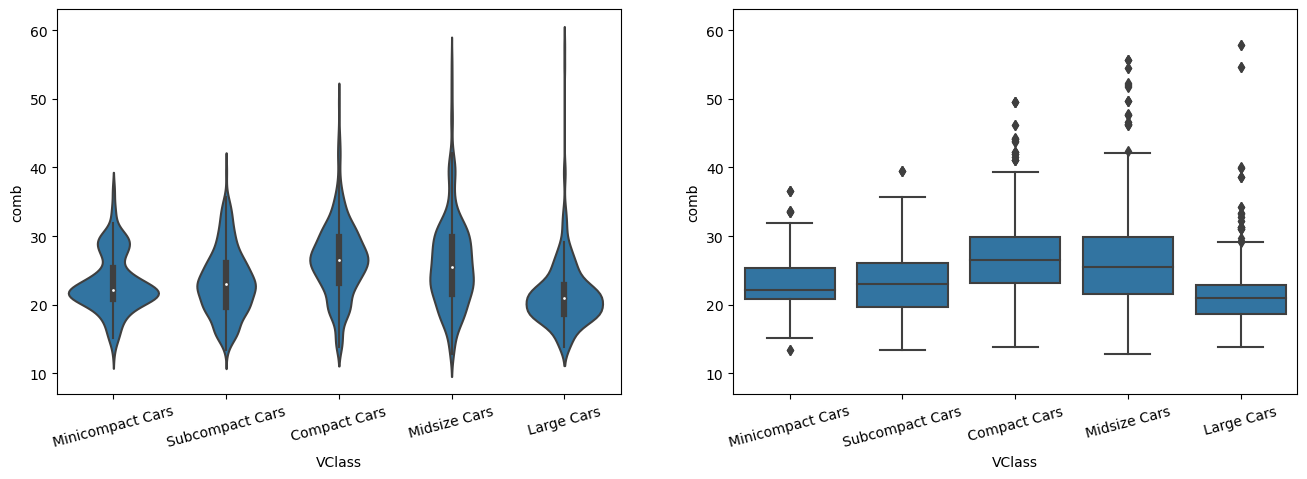

In [17]:
# Step 1. Import packages

# Step 2. Load data

# Step 3. Convert the "VClass" column from a plain object type into an ordered categorical type 
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, innner='quartile')
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

Note that the "color" parameter is being used here to make each box the same color. In order to provide a better comparison of the violin and box plots, a `ylim` expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by `violinplot()` is assigned to a variable, `ax1` is used to programmatically obtain those limit values.

**Documentation: [Axes objects](https://matplotlib.org/stable/api/axes_api.html) **

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default, this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

### Additional Variations

As with violinplot, boxplot can also render horizontal box plots by setting the numeric and categorical features to the appropriate arguments.

### Example 2. Horizontal box plot


<Axes: xlabel='comb', ylabel='VClass'>

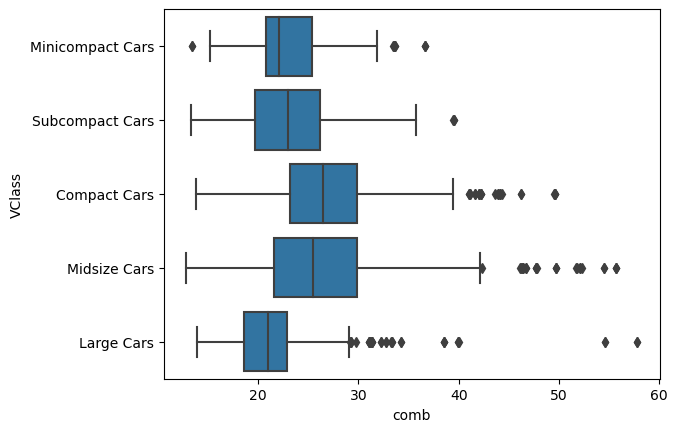

In [18]:
sb.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color)

In `violinplot`, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting `inner = 'quartile'`, three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

### Example 3. Violin plot with quartile information in the middle

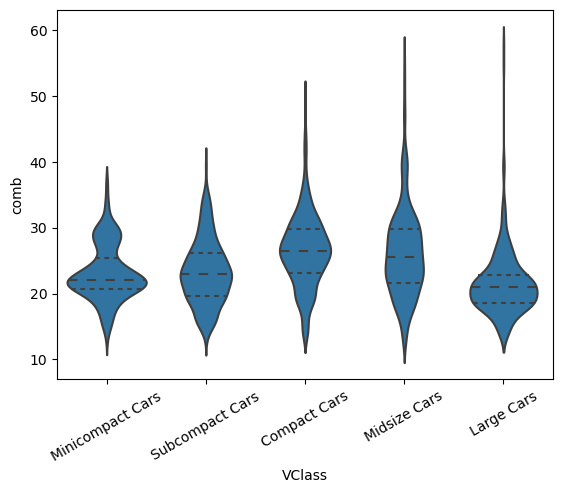

In [19]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);

## Clustered Bar Charts

- https://www.youtube.com/watch?v=0rFp55TtEJM
- https://www.youtube.com/watch?v=OnzWhpgM9Vs


To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a **clustered bar chart**. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

### Example 1. Plot a Bar chart between two qualitative variables
#### Preparatory Step 1 - Convert the "VClass" column from a plain object type into an ordered categorical type

```python
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
```

### Preparatory Step 2 - Add a new column for transmission type - Automatic or Manual
```python
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 

# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()
```

![image](images/screenshot-2020-10-14-at-5.00.10-pm.png)

In [20]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [21]:
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 

# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


### Step 3. Plot the bar chart

<Axes: xlabel='VClass', ylabel='count'>

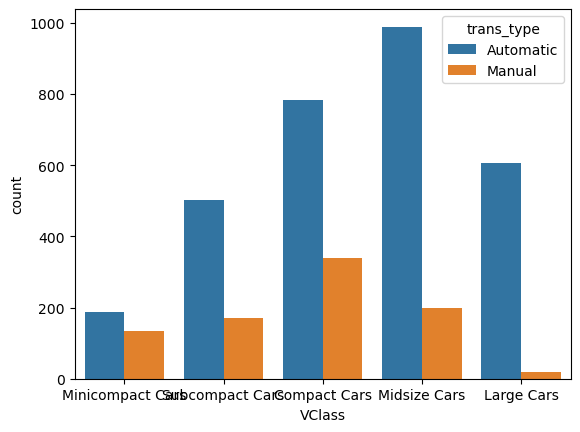

In [22]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')

### Alternative Approach

### Example 2. Plot a Heat Map between two qualitative variables

One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-D version of a histogram; here, we're using them as the 2-D version of a bar chart. The seaborn function heatmap() is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

### Step 1 - Get the data into desirable format - a DataFrame

In [23]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')




### Step 2 - Plot the heatmap


<Axes: xlabel='trans_type', ylabel='VClass'>

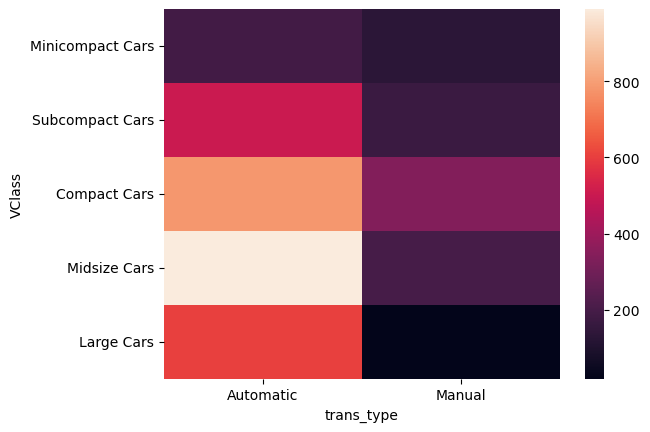

In [26]:
sb.heatmap(ct_counts)

### Example 3. Additional Variation

`annot = True` makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding `fmt = 'd'` means that annotations will all be formatted as integers instead. You can use `fmt = '.0f'` if you have any cells with no counts, in order to account for NaNs.

<Axes: xlabel='trans_type', ylabel='VClass'>

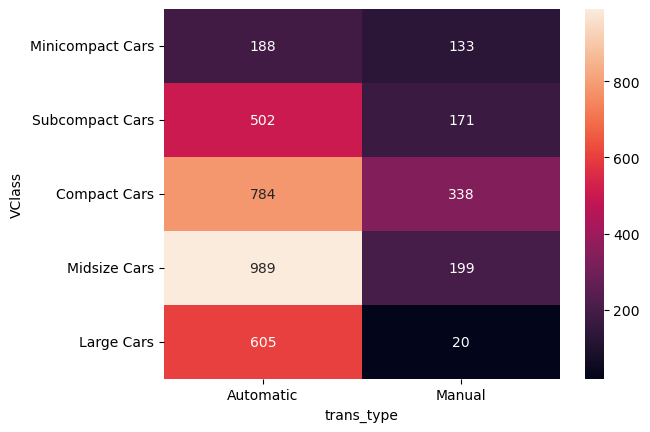

In [27]:
sb.heatmap(ct_counts, annot = True, fmt = 'd')